In [1]:
import torch
from torch import nn, Tensor
import torch.optim as optim
import numpy as np
import PIL
import matplotlib.pyplot as plt
import torchvision
from torch.utils.data import (
    Dataset,
    DataLoader,
)

/home/jianant/.conda/envs/pytorch/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import ganomaly_model

In [3]:
import utils

In [4]:
test_set = utils.MvtecDataset_test("bottle")
test_loader = DataLoader(dataset=test_set, batch_size=32, shuffle=False)

In [5]:
test_img = next(iter(test_loader))

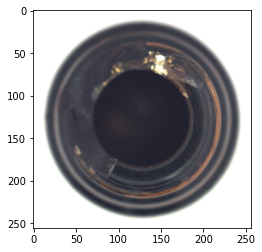

In [6]:
plt.imshow(np.rollaxis(test_img[0].numpy(), 0,3))

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [8]:
model = ganomaly_model.Ganomaly([256,256], 100, 3, 64, device)

In [9]:
model.load_state_dict(torch.load("01122023"))

<All keys matched successfully>

In [13]:
recon_img, latent_i, latent_o = model.generator(test_img.to(device))

In [14]:
recon_img = recon_img.detach().cpu()

In [16]:
recon_img.shape

torch.Size([32, 3, 256, 256])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


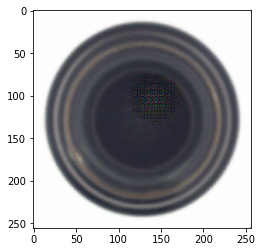

In [17]:
plt.imshow(np.rollaxis(recon_img.numpy()[0], 0,3))

In [23]:
latent_i = latent_i.detach().cpu().numpy()
latent_o = latent_o.detach().cpu().numpy()

In [24]:
print(np.mean(np.square(latent_i[0]-latent_o[0])))

0.10465151
